In [0]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns

%matplotlib inline

In [0]:
import requests
import json
#import dataset as ds

def new_session(url):
    s=requests.Session()
    #r = s.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    r=s.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'})
    
    print(r.status_code)
    print(s.cookies)
    return s,r

def dba_pred(words):
    url0='https://www.dba.dk/frontpage/Header/GetPredictiveSearch?searchWord='
#    words='lenovo+x240'
 
    url2='&sectionId=0'
    url=url0+words+url2   
    print(url)
    s,r=new_session(url)
    
    data = json.loads(r.text)
    return data
    
#data=dba_pred('lenovo+x240')

In [3]:
new_session('https://www.dba.dk/soeg/?soeg=oneplus+5')


200
<RequestsCookieJar[<Cookie FeatureToggleLuckyNumber=57 for .dba.dk/>, <Cookie SrpUrl=https%253a%252f%252fwww.dba.dk%252fsoeg%252f%253fsoeg%253doneplus%252b5 for .www.dba.dk/>, <Cookie dbatracker=id=c43a828f-96e1-4f57-8fcd-fda3e394815b for .www.dba.dk/>, <Cookie __RequestVerificationToken=J6Lq1s8tcU4fcUv9JnxaccqjCxFy-vJ8eYEaL-JvaeeWqB3sPZZLUJ63AEDU5d16CQKIARurZE9dzdCbpQRgUCGDw2IcENh2fzBFLDgWw-u5Uh4MpbaToIkzFscfg3QTzeWAIg2 for www.dba.dk/>, <Cookie dbasession=id=c8908d2f-695a-4967-a7fd-0e9de9da0ddf for www.dba.dk/>]>


(<requests.sessions.Session at 0x7f3ff625ba90>, <Response [200]>)

In [4]:
dba_pred('damecykel')

https://www.dba.dk/frontpage/Header/GetPredictiveSearch?searchWord=damecykel&sectionId=0
200
<RequestsCookieJar[<Cookie dbatracker=id=d4f35d84-2207-451a-9712-4e3acc2f05d1 for .www.dba.dk/>, <Cookie dbasession=id=a3e9fdb0-df25-48ae-8d66-930a03ed32cc for www.dba.dk/>]>


[{'ClassificationId': 58020,
  'Hits': 2314,
  'Name': 'Damecykler',
  'PlacementDisplayText': 'Cykler > Cykler og cykelanhængere',
  'Url': 'https://www.dba.dk/cykler/cykler-og-cykelanhaengere/damecykler/?soeg=damecykel&iswildcard'},
 {'ClassificationId': 58100,
  'Hits': 22,
  'Name': 'Cykeldele og tilbehør',
  'PlacementDisplayText': 'Cykler > Cykeldele og tilbehør',
  'Url': 'https://www.dba.dk/cykler/cykeldele-og-tilbehoer/cykeldele-og-tilbehoer/?soeg=damecykel&iswildcard'},
 {'ClassificationId': 58030,
  'Hits': 19,
  'Name': 'Herrecykler',
  'PlacementDisplayText': 'Cykler > Cykler og cykelanhængere',
  'Url': 'https://www.dba.dk/cykler/cykler-og-cykelanhaengere/herrecykler/?soeg=damecykel&iswildcard'},
 {'ClassificationId': 58060,
  'Hits': 17,
  'Name': 'Andre cykler',
  'PlacementDisplayText': 'Cykler > Cykler og cykelanhængere',
  'Url': 'https://www.dba.dk/cykler/cykler-og-cykelanhaengere/andre-cykler/?soeg=damecykel&iswildcard'},
 {'ClassificationId': 58010,
  'Hits': 10,


In [5]:
dba_pred('iphone8+64gb')

https://www.dba.dk/frontpage/Header/GetPredictiveSearch?searchWord=iphone8+64gb&sectionId=0
200
<RequestsCookieJar[<Cookie dbatracker=id=f08a1f47-b7a7-4f6e-b39a-6a73e4cb28eb for .www.dba.dk/>, <Cookie dbasession=id=425bc20b-495e-44a7-b4ff-ec9640300184 for www.dba.dk/>]>


[{'ClassificationId': 27160,
  'Hits': 2,
  'Name': 'iPhone',
  'PlacementDisplayText': 'Mobil og telefoni > Mobiltelefoner og tilbehør',
  'Url': 'https://www.dba.dk/mobil-og-telefoni/mobiltelefoner-og-tilbehoer/iphone/?soeg=iphone8 64gb&iswildcard'}]

In [6]:
url='https://www.dba.dk/soeg/?soeg=sco+damecykel'
s,r=new_session(url)

200
<RequestsCookieJar[<Cookie FeatureToggleLuckyNumber=65 for .dba.dk/>, <Cookie SrpUrl=https%253a%252f%252fwww.dba.dk%252fsoeg%252f%253fsoeg%253dsco%252bdamecykel for .www.dba.dk/>, <Cookie dbatracker=id=a968a2e5-aa02-429d-ab03-dd872862e6fd for .www.dba.dk/>, <Cookie __RequestVerificationToken=PA8Hdh4PJsGff0zv4FJjkZj65jOM0Wqexzoo34Dmdb1Eao4mTrfkruJ6tQDdcyMQ7N8ju9GaP2Dcn1peLH0WAcXTz8Y7GUUEWqpNNhF8i2GZWMEXNY4TmowucQlXOYbAbTavuw2 for www.dba.dk/>, <Cookie dbasession=id=f9917d33-3796-4ab1-98a2-896bf98806e0 for www.dba.dk/>]>


In [0]:
#dba_ search
#https://www.dba.dk/ajax/gallery/topfeaturegallery/data/?classification=25185&requestUri=https%3A%2F%2Fwww.dba.dk%2Fsoeg%2F%3Fsoeg%3Dlenovo%2Bx240

def dba_search(words):
    #word structure
    w=words.split()
    wx=''
    for n,wd in enumerate(w):
        print(n)
        if n==0:
            wx+=wd        
        if n>0:
            wx+='%2B'+wd

    #create url
#    url0='https://www.dba.dk/ajax/gallery/topfeaturegallery/data/?classification=25185&requestUri=https%3A%2F%2Fwww.dba.dk%2Fsoeg%2F%3Fsoeg%3D'
    url0='https://www.dba.dk/ajax/gallery/topfeaturegallery/data/?classification=25185&requestUri=https%3A%2F%2Fwww.dba.dk%2Fsoeg%2F%3Fsoeg%3D'
    url=url0+wx
    print(wx)
    print(url)
    
    s=requests.Session()
    r=s.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    
    print(r.status_code)
    df=pd.read_json(r.text)
    print(df.shape)
    
    return df
#df=create_search('lenovo x230')

In [0]:
def dba_gui():
    dba_search_string=input('Indtast søgestreng')
    df=dba_search(dba_search_string)
    print(dba_search_string)
    return df

#dba_gui()

#3Dlenovo%2Bx240
#https://www.dba.dk/soeg/?soeg=lenovo+x240


In [13]:
df=dba_search('apple iphone 7')

0
1
2
apple%2Biphone%2B7
https://www.dba.dk/ajax/gallery/topfeaturegallery/data/?classification=25185&requestUri=https%3A%2F%2Fwww.dba.dk%2Fsoeg%2F%3Fsoeg%3Dapple%2Biphone%2B7
200
(48, 8)


In [16]:
#df=dba_search('lenovo x240')
df.head()


,Image,HasImage,Link,Description,SecondaryDescription,Price,Type,Target,price_cleaned
0,https://i.ebayimg.com/images/g/24cAAOSwovJeFB-...,True,/lenovo-thinkpad-t540p-ghz/id-114137431/,"Lenovo ThinkPad T540p, GHz 2.4",,2.069 kr.,Standard,_self,2069
1,https://i.ebayimg.com/images/g/bNgAAOSwDYZdwUv...,True,/dell-latitude-e5430-intel/id-1060869738/,"Dell Latitude E5430, Intel Cor",,800 kr.,Standard,_self,800
2,https://i.ebayimg.com/images/g/A~4AAOSwWEddr9O...,True,/hp-hp-probook-430-g3-13/id-113155577/,"HP HP Probook 430 G3 13"" 2,3GH",,1.999 kr.,Standard,_self,1999
3,https://i.ebayimg.com/images/g/my8AAOSw0w9eFB-...,True,/lenovo-thinkpad-t480s-ghz/id-114137447/,"Lenovo ThinkPad T480s, GHz 1.8",,7.749 kr.,Standard,_self,7749
4,https://i.ebayimg.com/images/g/YxAAAOSwHB5dy7y...,True,/lenovo-lenovo-thinkpad-x240/id-113275474/,Lenovo Lenovo Thinkpad X240 12,,2.999 kr.,Standard,_self,2999


In [0]:
df['price_cleaned']=df['Price'].str.replace(r'[a-z. ]+','')

ValueError: ignored

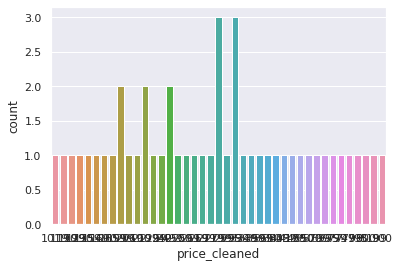

In [18]:
#PLOTS
g = sns.countplot(df.price_cleaned)

#import seaborn as sns
#mport matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.relplot(df.price_cleaned)

In [0]:
df['price_cleaned']

0     4995
1     3999
2     1999
3     1999
4     1999
5     2199
6     3499
7     3450
8     1999
9     2500
10    2795
11    1999
12    3449
13    1190
14    2709
15    1149
16    6500
17    2999
18    1709
19    3099
20    4899
21    3799
22    7259
23    3499
24    2989
25    3119
26     949
27    3599
28    2269
29    1470
30    4499
31    4379
32    3999
33    2849
34    4589
35    4499
36    2299
37    1297
38    1899
39    3269
40    2999
41    7000
42    3459
43    3499
44    2889
45      50
46    2195
47    2769
Name: price_cleaned, dtype: object

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

In [0]:
df

,Description,HasImage,Image,Link,Price,SecondaryDescription,Type,price_cleaned
0,Lenovo Lenovo ThinkPad X240 20,True,https://i.ebayimg.com/images/g/ImoAAOSwT0pbqcK...,/lenovo-lenovo-thinkpad-x240/id-107981888/,4.995 kr.,,Standard,4995
1,"Lenovo ThinkPad X240, GB ram 8",True,https://i.ebayimg.com/images/g/u-gAAOSwTY9bqY-...,/lenovo-thinkpad-x240-gb-ram/id-107899422/,3.999 kr.,,Standard,3999
2,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/mn8AAOSwZq5bqc8...,/lenovo-lenovo-thinkpad-x240/id-107749836/,1.999 kr.,,Standard,1999
3,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/f1IAAOSwG3Rbqfz...,/lenovo-lenovo-thinkpad-x240/id-107749030/,1.999 kr.,,Standard,1999
4,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/xxUAAOSwC0dbqcv...,/lenovo-lenovo-thinkpad-x240/id-107748960/,1.999 kr.,,Standard,1999
5,Lenovo Lenovo X240 Bærbar PC (,True,https://i.ebayimg.com/images/g/p9cAAOSwoW1bpMH...,/lenovo-lenovo-x240-baerbar-pc/id-107963988/,2.199 kr.,,Standard,2199
6,Lenovo Lenovo Thinkpad X240 12,True,https://i.ebayimg.com/images/g/pVYAAOSwAOxbqcU...,/lenovo-lenovo-thinkpad-x240/id-107853240/,3.499 kr.,,Standard,3499
7,"Lenovo X240, Intel i7 GHz, 8 G",True,https://i.ebayimg.com/images/g/dxMAAOSwBNdbqS~...,/lenovo-x240-intel-i7-ghz-8/id-1048397582/,3.450 kr.,,Standard,3450
8,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/Mq4AAOSwFYZbqfX...,/lenovo-lenovo-thinkpad-x240/id-107749471/,1.999 kr.,,Standard,1999
9,"Lenovo Lenovo x240 uldtrabook,",True,https://i.ebayimg.com/images/g/QI0AAOSwQLRbpnb...,/lenovo-lenovo-x240-uldtrabook/id-1048314699/,2.500 kr.,,Standard,2500


  Found existing installation: seaborn 0.8.1
    Uninstalling seaborn-0.8.1:
      Successfully uninstalled seaborn-0.8.1


In [0]:
df=pd.read_json(r.text)

NameError: name 'r' is not defined

In [0]:
df

,Description,HasImage,Image,Link,Price,SecondaryDescription,Type
0,Lenovo Lenovo Thinkpad X240 12,True,https://i.ebayimg.com/images/g/ooYAAOSwzgJbpbS...,/lenovo-lenovo-thinkpad-x240/id-107853240/,3.499 kr.,,Standard
1,"Lenovo ThinkPad X240 - Brugt,",True,https://i.ebayimg.com/images/g/AVIAAOSwvmRa4el...,/lenovo-thinkpad-x240-brugt/id-106379511/,2.795 kr.,,Standard
2,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/2GIAAOSwX8dbpdP...,/lenovo-lenovo-thinkpad-x240/id-107748960/,1.999 kr.,,Standard
3,Lenovo Lenovo ThinkPad X240 20,True,https://i.ebayimg.com/images/g/s7gAAOSwAm9bpc2...,/lenovo-lenovo-thinkpad-x240/id-107967168/,4.995 kr.,,Standard
4,Lenovo Lenovo X240 Bærbar PC (,True,https://i.ebayimg.com/images/g/p9cAAOSwoW1bpMH...,/lenovo-lenovo-x240-baerbar-pc/id-107963988/,2.199 kr.,,Standard
5,"Lenovo ThinkPad X240, GB ram 8",True,https://i.ebayimg.com/images/g/tLwAAOSwtAlbpd4...,/lenovo-thinkpad-x240-gb-ram/id-107929444/,3.999 kr.,,Standard
6,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/bqMAAOSwusNbkkW...,/lenovo-lenovo-thinkpad-x240/id-107752763/,1.999 kr.,,Standard
7,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/QLAAAOSwb-RbpdW...,/lenovo-lenovo-thinkpad-x240/id-107749836/,1.999 kr.,,Standard
8,"Lenovo Lenovo x240 uldtrabook,",True,https://i.ebayimg.com/images/g/QI0AAOSwQLRbpnb...,/lenovo-lenovo-x240-uldtrabook/id-1048314699/,2.500 kr.,,Standard
9,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/yW0AAOSwYcBbpek...,/lenovo-lenovo-thinkpad-x240/id-107749030/,1.999 kr.,,Standard
